In [74]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [75]:
"""
Load data from csv file.

"""
dataframe = pd.read_csv("SpotifyFeaturesNumeric.csv")
data = np.array(dataframe)
m, n = np.shape(data)
y = data[:, 0]   # Previous classification
x = data[:, 2:n] # Data for kmeas 
print('x:', np.shape(x))
print('y:', np.shape(y))

x: (232725, 14)
y: (232725,)


In [76]:
# K-means Functions
def dist(p, q):
    resta = p - q
    d = np.dot(resta.T, resta)
    return d

def min_dist(xi, mu):
    c = []
    k, n = mu.shape
    for i in range(k):
        c.append(dist(xi, mu[i]))
    indx = np.argmin(c)  
    return indx

def min_dist_all(x, mu):
    m, n = x.shape
    c = np.zeros(m, dtype = int)
    for i in range(m):
        c[i] = min_dist(x[i], mu)
    return c

def move_centroids(x, c, k, mu):
    m, n = x.shape
    new_mu = np.zeros((k, n))
    for i in range(k):
        elements = x[c == i] #Elements with the same centroid
        if (len(elements) == 0):
            new_mu[i] = mu[i] #No se mueve el centroide
        else:
            new_mu[i] = np.sum(elements, axis = 0) / len(elements) 
    return new_mu

def cost(x, c, mu):
    m, n = x.shape
    r = []
    for i in range(m):
        idx = c[i]
        r.append(dist(x[i], mu[idx]))
    r = np.array(r)
    costo = (1 / m) * (np.sum(r))
    return costo


def kmeans_model(x, k, epochs = 50):
        #Initialize variables
        np.random.seed(2)
        m, n = x.shape
        idx = np.random.choice(m, k)
        print(idx)
        mu = x[idx]
        c = None
        J = []
        cluster = []
        it = 0
        
        while True and it < epochs:
            # Find new assignments
            new_c = min_dist_all(x, mu)
            J.append(cost(x, new_c, mu)) 
            cluster.append((np.copy(mu), np.copy(new_c))) #Save for registering the movement of centroids
            it += 1
            # If no assignments have changed, we have finished.
            if np.all(c == new_c):
                break;
            
            # if not, keep the new assignments,
            c = new_c
            
            # Update centroids, compute new means based on c
            mu = move_centroids(x, np.array(c), k, mu)                 
        return mu, c, cluster, J

In [77]:
# k-means model 
k = 3
mu, c, cluster, J = kmeans_model(x, k, epochs = 10)

[ 89256 100879 203245]


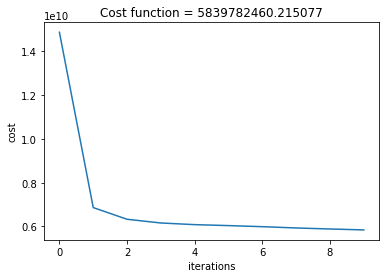

In [78]:
plt.plot(J)
plt.title('Cost function = ' + str(J[len(J)-1]))
plt.xlabel('iterations')
plt.ylabel('cost');

20
[ 89256 100879 203245  95816 175638 162091  84434  33867  80232 175367
  53922  33201  43595  35541  70703 142143  32031 183002 203156 172156]
21
[ 89256 100879 203245  95816 175638 162091  84434  33867  80232 175367
  53922  33201  43595  35541  70703 142143  32031 183002 203156 172156
 216692]
22
[ 89256 100879 203245  95816 175638 162091  84434  33867  80232 175367
  53922  33201  43595  35541  70703 142143  32031 183002 203156 172156
 216692 121637]
23
[ 89256 100879 203245  95816 175638 162091  84434  33867  80232 175367
  53922  33201  43595  35541  70703 142143  32031 183002 203156 172156
 216692 121637 182951]
24
[ 89256 100879 203245  95816 175638 162091  84434  33867  80232 175367
  53922  33201  43595  35541  70703 142143  32031 183002 203156 172156
 216692 121637 182951 111718]
25
[ 89256 100879 203245  95816 175638 162091  84434  33867  80232 175367
  53922  33201  43595  35541  70703 142143  32031 183002 203156 172156
 216692 121637 182951 111718 121604]
26
[ 89256 100

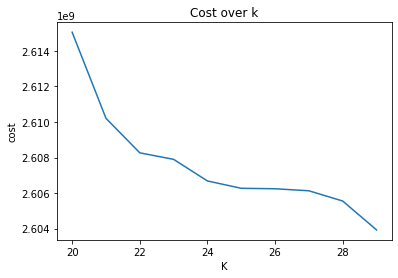

In [80]:
# Chosing K
K = np.arange(20,30) 
Jn = []
idx = 0
for k in K:
    print(k)
    mu, c, cluster, J = kmeans_model(x, k, epochs = 2)
    Jn.append(J[len(J)-1])
    idx += 1
print(Jn)
plt.plot(K, Jn)
plt.title('Cost over k')
plt.xlabel('K')
plt.ylabel('cost');

In [81]:
"""
K-means using sklearn.
"""
kmeans = KMeans(n_clusters = 26)
y_pred = kmeans.fit_predict(x)
y_pred

array([ 3, 22, 23, ..., 10, 15, 21])

In [82]:
data_out = dataframe.copy()
data_out['cluster'] = y_pred
data_out

,genre,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,cluster
0,14,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,4,0.3460,-1.828,0,0.0525,166.969,3,0.814,3
1,14,0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,9,0.1510,-5.559,1,0.0868,174.003,3,0.816,22
2,14,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,3,0.1030,-13.879,1,0.0362,99.488,4,0.368,23
3,14,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,4,0.0985,-12.178,0,0.0395,171.758,3,0.227,10
4,14,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,8,0.2020,-21.150,0,0.0456,140.576,3,0.390,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,23,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,5,0.0845,-10.626,0,0.0316,115.542,3,0.962,21
232721,23,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,7,0.2370,-6.944,1,0.0337,113.830,3,0.969,4
232722,23,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,5,0.0945,-8.282,0,0.1480,84.135,3,0.813,10
232723,23,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,1,0.3330,-7.137,0,0.1460,100.031,3,0.489,15


In [83]:
data_out.to_excel(r'SpotifyKmeans.xlsx', index = False, header=True)